In [37]:
import pandas as pd
import seaborn as sns
import useful_rdkit_utils as uru
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
import numpy as np
import matplotlib.pyplot as plt

Read some data.  This is a subset of the [Drewry dataset on Polaris](https://polarishub.io/datasets/polaris/drewry2017-pkis2-subset-v2). For simplicity, we'll just grab 20 rows. 

In [51]:
df = pd.read_csv("drewry_test.csv")
df = df.sample(20)

Define the columns we'll use in the heatmap. 

In [52]:
cols = ['EGFR', 'KIT', 'RET', 'LOK']

View the data. The EGFR, KIT, RET, and LOK columns are % inhibition.  The cluster column is from a previous butina clsutering run. 

In [53]:
df

,SMILES,EGFR,KIT,RET,LOK,cluster
66,COc1ccc(Nc2nccc(N3CCC(NC(=O)C(C)c4ccc(Cl)cc4)C...,14.0,31.0,2.0,0.0,0
31,Nc1nc(-c2ccc3c(N)n[nH]c3c2)cc(N2CCCCC2)n1,3.0,5.0,1.0,0.0,3
68,COc1ccc(Nc2nccc(N3CCC(NC(=O)Nc4ccc5c(c4)OCO5)C...,25.0,48.0,9.0,0.0,0
7,CNc1nccc(-c2ccc3c(N)n[nH]c3c2)n1,25.0,57.0,80.0,23.0,3
74,COc1ccc(Nc2nccc(N3CCC(NS(=O)(=O)c4ccc(NC(C)=O)...,36.0,9.0,28.0,14.0,0
13,COc1cccc(C2=C(Nc3cccc(Cl)c3)C(=O)NC2=O)c1,25.0,14.0,37.0,9.0,1
86,O=C(Nc1ccccc1F)NC1CCN(c2ccnc(Nc3ccc(F)cc3)n2)C1,0.0,5.0,8.0,0.0,0
21,C[C@@H]1CC[C@H](C(=O)NC2CCCCC2)CN1c1cc(-c2ccc3...,45.0,27.0,53.0,0.0,3
83,Cn1cncc1C(=O)NC1CCN(c2ccnc(Nc3ccc(F)cc3)n2)C1,15.0,17.0,0.0,0.0,0
11,COc1cccc(C2=C(Nc3ccc(Cl)c(C(=O)O)c3)C(=O)NC2=O)c1,24.0,6.0,11.0,0.0,1


Plot the heatmap in the normal fashion, where we use the values in the heatmap cells to cluster. 

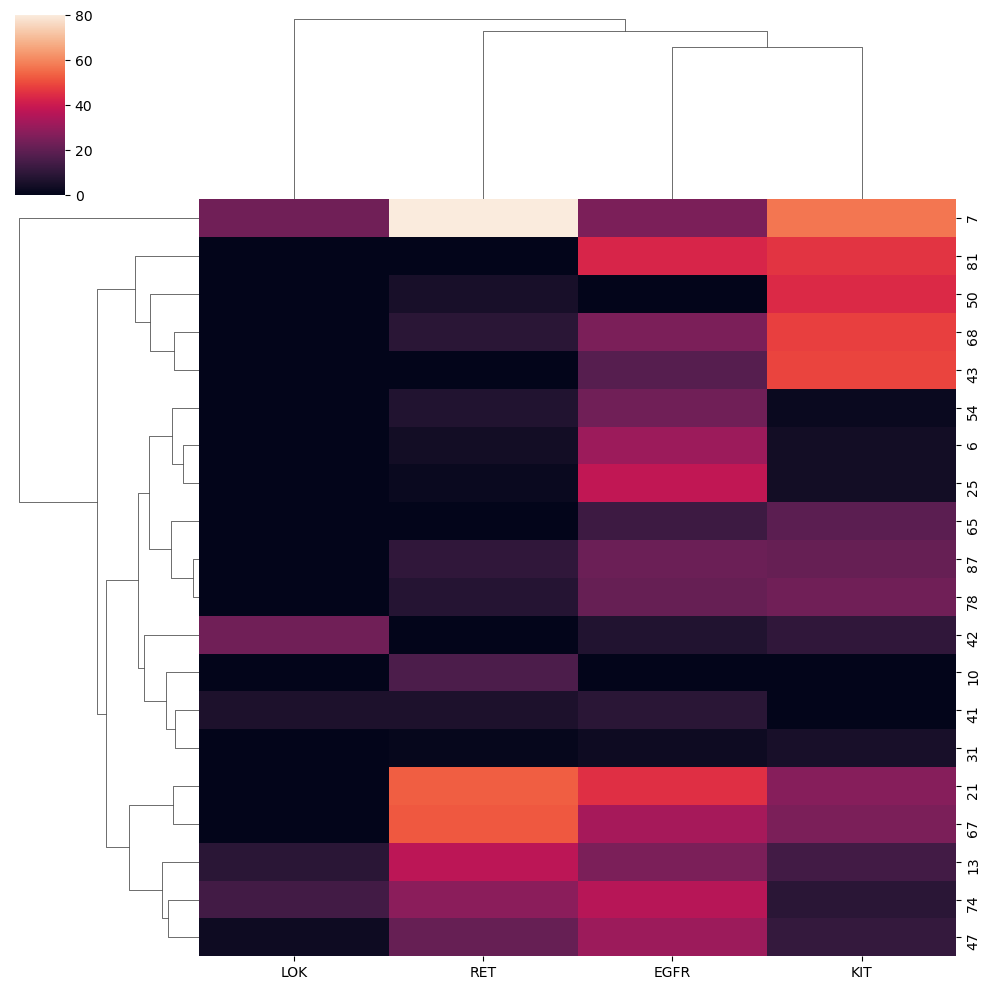

In [46]:
g = sns.clustermap(data=df[cols])

Now we'll change this and use chemical similarity to cluster along the y-axis. 

In [47]:
smi2fp = uru.Smi2Fp()
df['fp'] = df.SMILES.apply(smi2fp.get_np)

Create a similarity matrix for the fingerprints the cluster the similarity matrix. 

In [48]:
dist_mat = pdist(np.stack(df.fp),metric='jaccard')
link_mat = linkage(dist_mat, optimal_ordering=True)

Plot the heatmap and put the clsuter id on the right axis as a check. 

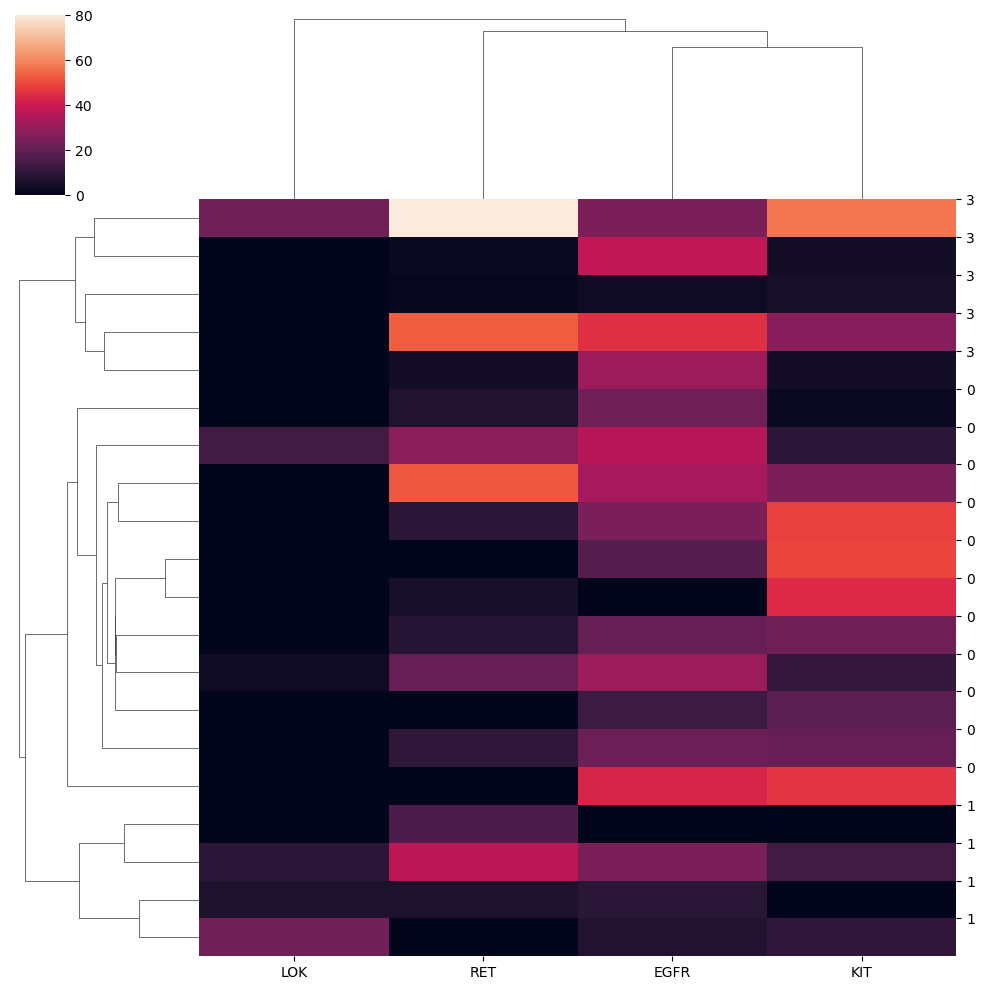

In [50]:
g = sns.clustermap(data=df[cols], row_linkage=link_mat)
x = g.dendrogram_row.reordered_ind
row_labels = df.cluster.values[g.dendrogram_row.reordered_ind]
g.ax_heatmap.set(yticks=range(0,len(df)),yticklabels=row_labels)
_ = plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)